## A GENTLE INTRODUCTION TO TORCH.AUTOGRAD

In [1]:
import torch

/home/akiyo/miniconda3/envs/pytorch/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
x = torch.autograd.Variable(torch.ones(4, 5))
y = torch.cos(x)
x_tensor_cos = torch.cos(x.data)
print(x_tensor_cos == torch.cos(x.data))

tensor([[True, True, True, True, True],
        [True, True, True, True, True],
        [True, True, True, True, True],
        [True, True, True, True, True]])


In [43]:
x = torch.tensor(1.)
a = torch.tensor(1., requires_grad=True)
b = torch.tensor(2., requires_grad=True)
c = torch.tensor(3., requires_grad=True)

y = a**2 * x + b * x + c

print('before:', a.grad, b.grad, c.grad)
grads = torch.autograd.grad(y, [a, b, c])
print('after:', grads[0], grads[1], grads[2])

Before: None None None
df/dx1(x1=1.0), df/dx2(x2=2.0), df/dx3(x3=3.0)
 After: 2.0, 1.0, 1.0


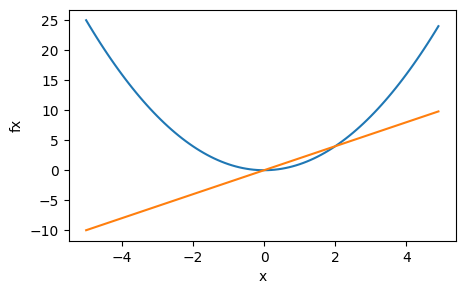

In [57]:
import seaborn as sns
import numpy as np
import pandas as pd
from pandas import Series 
import matplotlib.pyplot as plt

X = torch.arange(-5, 5, 0.1, requires_grad=True)
fX = X ** 2
fX.sum().backward()
#fX.backward(torch.ones_like(X))
dfX = X.grad

X, fX, dfX = X.detach().numpy(), fX.detach().numpy(), dfX.detach().numpy()

data = {'x': Series(X), 'fx': Series(fX), 'dfx': Series(dfX)}
df = pd.DataFrame(data)

plt.figure(figsize=(5, 3))
sns.lineplot(data=df, x="x", y="fx")
sns.lineplot(data=df, x="x", y="dfx")

plt.show()

## Computational Graph

In [10]:
import torch
from torchviz import make_dot

tensor(5., grad_fn=<AddBackward0>)


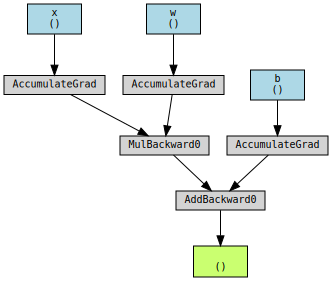

In [11]:
x = torch.tensor(1.0, requires_grad=True)
w = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(3.0, requires_grad=True)

y = x * w + b  # 計算グラフを構築
print(y)

make_dot(y,params={'x':x,'w':w,'b':b})

tensor(1., grad_fn=<PowBackward0>)


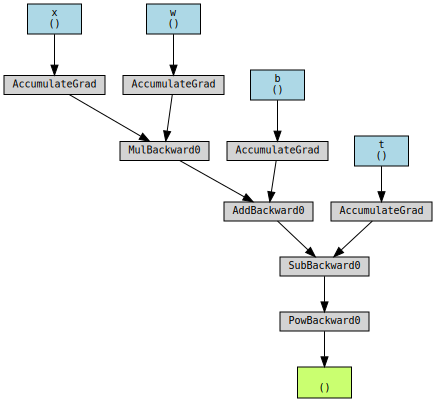

In [12]:
#正解値 t との2乗誤差を計算
t = torch.tensor(4.0, requires_grad=True)
    #tは正解値のつもりなので本来自動微分を計算する必要はないが，requires_grad=Trueにしておかないとグラフに含まれなくなる
error = (y - t)**2
print(error)

# 計算グラフを表示
make_dot(error,params={'x':x,'w':w,'b':b, 't':t})